In [1]:
import os
import sys
from scgt import GeoTiff
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/')
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/ecoscape-connectivity/')
from EcoLinker.EcoLinker.restorationOptimizer import restorationOptimizer, defecitRestoration, lowResDefecitRestoration, probalisticDeficitRestoration, noisyDefecitRestoration, utopianRestoration, flowRestoration, lowResFlowRestoration
from ecoscape_connectivity_local import repopulation, util
import matplotlib.pyplot as plt
import ecoscape_connectivity
from scgt import GeoTiff, Tile
import numpy as np
import torch
import rasterio

In [2]:
DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets"
HABITAT_PATH = os.path.join(DATA_PATH, "smol/hab_smol.tif")
TERRAIN_PATH = os.path.join(DATA_PATH, "smol/terrain.tif")
RESTORED_TERRAIN_PATH = os.path.join(DATA_PATH, "smol/restored_ter_smol.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "paper_repro/transmission_refined_1.csv")

CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop.tif")
NOISY_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_noisy.tif")
UTOPIAN_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_utopian.tif")
RESTORED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_after_restoration.tif")
FLOW_PATH = os.path.join(DATA_PATH, "smol/grad.tif")
NOISY_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_noisy.tif")
UTOPIAN_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_utopian.tif")
RESTORED_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_after_restoration.tif")
DEATH_PATH = os.path.join(DATA_PATH, "smol/death.tif")
LOW_RES_DEATH_PATH = os.path.join(DATA_PATH, "smol/death_low_res.tif")
LOW_RES_FLOW_PATH = os.path.join(DATA_PATH, "smol/flow_low_res.tif")

# terrain changed tiffs
TERRAIN_CHANGED_DEFICIT = os.path.join(DATA_PATH, "smol/changed_terrain_defecit_100.tif")
TERRAIN_CHANGED_NOISY = os.path.join(DATA_PATH, "smol/changed_terrain_noisy.tif")
TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, "smol/changed_terrain_utopian.tif")
TERRAIN_CHANGED_PROBALISTIC = os.path.join(DATA_PATH, "smol/changed_terrain_prob_100.tif")
# changed connectivity
CONNECTIVITY_DIFF_DEFECIT = os.path.join(DATA_PATH, "smol/connectivity_diff_defecit_100.tif")
CONNECTIVITY_DIFF_NOISY = os.path.join(DATA_PATH, "smol/connectivity_diff_noisy.tif")
CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, "smol/connectivity_diff_utopian.tif")
CONNECTIVITY_DIFF_PROBALISTIC = os.path.join(DATA_PATH, "smol/connectivity_diff_prob_100.tif")

PERMIABILITY_TIFF_PATH = os.path.join(DATA_PATH, "smol/permiability.tif")


unrestorable = [104,500, 501, 502, 503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,900, 901, 902, 903, 904, 905, 906,907,980,981,982,983,984,985,986,909,910,1000,1001,1002,1003,1004,1100,1101,1111,1112,1102,1103,1104,1105,1106,1200,1201,1202,1203,1204,1205,1206,1207,1300,1301,1302,1303,1304,1305,    1402]

with GeoTiff.from_file(HABITAT_PATH) as hab:
    hab_mat = hab.get_all_as_tile().m.squeeze(0)

defecitOptimizer = defecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 100, hab_mat, unrestorable)
probalisticDefecitOptimizer = probalisticDeficitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 100, hab_mat, unrestorable)
noisyOptimizer = noisyDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, NOISY_CONNECTIVITY_PATH, NOISY_FLOW_PATH, 1, hab_mat, unrestorable)
utopianOptimizer = utopianRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, UTOPIAN_CONNECTIVITY_PATH, UTOPIAN_FLOW_PATH, 1.0, hab_mat, unrestorable)
lowResDefecitOptimizer = lowResDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_DEATH_PATH, PERMEABILITY_PATH, 2, 2, 50, hab_mat, unrestorable)
flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, hab_mat, unrestorable)
lowResFlowOptimizer = lowResFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_FLOW_PATH, PERMEABILITY_PATH, 2, 2, 50, hab_mat, unrestorable)

# Flow based restoration

In [3]:
# Flow restoration
flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50) #hab_mat, unrestorable)

# flowOptimizer.run_connectivity()
permiability_restored = flowOptimizer.restore()
flowOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {flowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {flowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {flowOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 15522
Permiability Restored: 4.999999999999998
Percent connectivity changed: 0.005763508990026924%
Connectivity/permiability_restored: 3104.400000000001


In [4]:
print(flowOptimizer.changed_pixels)

{(124, 169): 4489, (65, 37): 4356, (262, 48): 4356, (293, 126): 4225, (257, 166): 4225, (117, 157): 4096, (289, 167): 4096, (229, 144): 4096, (129, 77): 4096, (152, 132): 4096, (119, 27): 4096, (294, 117): 4096, (295, 117): 4096, (24, 23): 3969, (182, 122): 3969, (105, 33): 3969, (214, 149): 3844, (147, 161): 3844, (165, 105): 3844, (136, 173): 3844, (85, 67): 3844, (52, 32): 3844, (175, 90): 3844, (293, 117): 3844, (134, 121): 3844, (254, 25): 3844, (188, 160): 3844, (291, 116): 3721, (165, 104): 3721, (194, 132): 3721, (52, 123): 3721, (256, 162): 3721, (142, 121): 3721, (135, 173): 3721, (290, 109): 3721, (164, 105): 3600, (154, 114): 3600, (159, 82): 3600, (81, 64): 3600, (269, 64): 3600, (116, 119): 3600, (42, 109): 3600, (140, 123): 3600, (154, 113): 3600, (177, 161): 3600, (203, 130): 3600, (168, 156): 3600, (28, 37): 3600, (256, 23): 3600, (187, 160): 3600}


In [9]:
TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, "smol/changed_terrain_low_flow.tif")
CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, "smol/connectivity_diff_low_flow.tif")

# paint changed terrain pixels
flowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN, flowOptimizer.changed_pixels, value=1)
# view diff of before and after
flowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_UTOPIAN)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [3]:
with GeoTiff.from_file(flowOptimizer.flow_fn) as flow_tif:
    flow = np.array(flow_tif.get_all_as_tile().m)

print(np.max(flow))
highest_flow = flowOptimizer.get_highest_flow_pixels(flow, 50)
print(highest_flow)

5476
{(124, 169): 4489, (65, 37): 4356, (262, 48): 4356, (293, 126): 4225, (257, 166): 4225, (117, 157): 4096, (289, 167): 4096, (229, 144): 4096, (129, 77): 4096, (152, 132): 4096, (119, 27): 4096, (294, 117): 4096, (295, 117): 4096, (24, 23): 3969, (182, 122): 3969, (105, 33): 3969, (214, 149): 3844, (147, 161): 3844, (165, 105): 3844, (136, 173): 3844, (85, 67): 3844, (52, 32): 3844, (175, 90): 3844, (293, 117): 3844, (134, 121): 3844, (254, 25): 3844, (188, 160): 3844, (291, 116): 3721, (165, 104): 3721, (194, 132): 3721, (52, 123): 3721, (256, 162): 3721, (142, 121): 3721, (135, 173): 3721, (290, 109): 3721, (164, 105): 3600, (154, 114): 3600, (159, 82): 3600, (81, 64): 3600, (269, 64): 3600, (116, 119): 3600, (42, 109): 3600, (140, 123): 3600, (154, 113): 3600, (177, 161): 3600, (203, 130): 3600, (168, 156): 3600, (28, 37): 3600, (256, 23): 3600, (187, 160): 3600}


# Low Res Flow

In [3]:
# lowResFlowOptimizer.run_connectivity()
permiability_restored = lowResFlowOptimizer.restore(verbose=True)
lowResFlowOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {lowResFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResFlowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResFlowOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


KeyboardInterrupt: 

In [12]:
TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, "smol/changed_terrain_flow_low_res.tif")
CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, "smol/connectivity_diff_flow_low_res.tif")

# paint changed terrain pixels
lowResFlowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN)
# view diff of before and after
lowResFlowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_UTOPIAN)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [9]:
print(lowResFlowOptimizer.changed_pixels)

{(248, 22): 69, (248, 23): 68, (249, 22): 72, (249, 23): 68, (232, 18): 68, (232, 19): 70, (233, 18): 67, (233, 19): 70, (90, 40): 67, (90, 41): 68, (91, 40): 69, (91, 41): 69, (204, 94): 67, (204, 95): 68, (205, 94): 68, (205, 95): 69, (236, 156): 67, (236, 157): 69, (237, 156): 70, (237, 157): 66, (46, 40): 66, (46, 41): 69, (47, 40): 71, (47, 41): 65, (110, 92): 67, (110, 93): 70, (111, 92): 66, (111, 93): 68, (220, 144): 73, (220, 145): 65, (221, 144): 64, (221, 145): 69, (58, 46): 69, (58, 47): 69, (59, 46): 62, (59, 47): 70, (276, 20): 69, (276, 21): 65, (277, 20): 69, (277, 21): 67, (230, 18): 65, (230, 19): 67, (231, 18): 69, (231, 19): 69, (112, 104): 69, (112, 105): 67, (113, 104): 69, (113, 105): 65, (278, 22): 68, (278, 23): 66, (279, 22): 69, (279, 23): 67}


<Figure size 500x500 with 0 Axes>

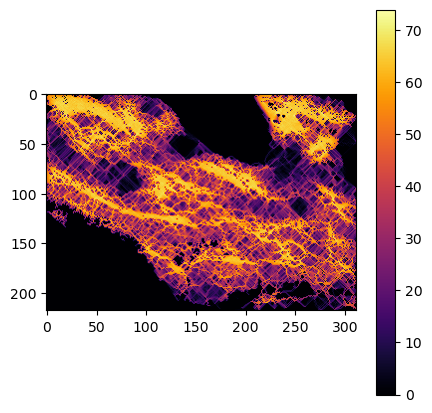

<Figure size 500x500 with 0 Axes>

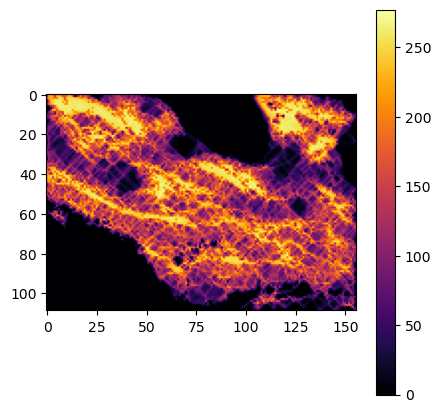

{(124, 11): 277, (116, 9): 275, (45, 20): 273, (118, 78): 272, (102, 47): 272, (110, 72): 271, (23, 20): 271, (55, 46): 271, (139, 11): 270, (29, 23): 270, (138, 10): 270, (56, 52): 270, (115, 9): 270, (62, 47): 270, (100, 45): 269, (92, 38): 269, (121, 80): 269, (46, 20): 268, (120, 11): 268, (58, 45): 268, (9, 10): 268, (84, 36): 268, (121, 5): 268, (8, 5): 268, (27, 52): 268, (121, 81): 268, (58, 50): 268, (64, 49): 268, (127, 20): 267, (57, 51): 267, (63, 48): 267, (22, 24): 267, (94, 42): 267, (117, 8): 267, (58, 49): 267, (140, 29): 267, (25, 52): 266, (27, 21): 266, (103, 46): 266, (104, 46): 266, (101, 45): 266, (99, 43): 266, (135, 27): 266, (117, 9): 266, (105, 46): 266, (102, 44): 266, (26, 53): 266, (7, 5): 266, (52, 39): 266, (121, 10): 265, (45, 14): 265, (118, 16): 265}


In [8]:
import math
with GeoTiff.from_file(lowResFlowOptimizer.flow_fn) as flow:
    flow.draw_geotiff()
with GeoTiff.from_file(lowResFlowOptimizer.scaled_flow_fn) as flow:
    flow.draw_geotiff()
    print(lowResFlowOptimizer.get_highest_death_pixels(flow, 52))
